<a href="https://colab.research.google.com/github/JLeninMChura/Caso_Covid/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalamos Todo lo que usaremos


In [8]:
!pip install empiricaldist
!pip install pyjanitor
!pip install seaborn
!pip install statsmodels
!pip install session-info
!pip install palmerpenguins
!pip install scikit-learn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.5-py3-none-any.whl size=12467 sha256=3dd050f1210196dd990d2f270323912a6990dad60fa2822e224f40f11d2dbf55
  Stored in directory: /root/.cache/pip/wheels/0d/d0/ae/1ad4c7593703e55b2321b23b49d3b0d55261b59d7036d7045b
Successfully built empiricaldist
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=15ce68b1a776b804e32b4fa5adf4ac97e2bda893701f131948e4ff33f6ff0417
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [9]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

#Leemos el Archivo Excel

In [2]:
import pandas as pd


data = pd.read_excel("/content/DataCovid.xlsx")

**Mostramos las 10 primas filas**

In [21]:
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,muestra_rap1,prueba_rap1,resultado_rap1,fecha_res_rap1,secuenciamiento,asintomatico
0,542,2021,5,09-02-2021,PUNO,PUNO,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
1,1234,2020,10,07-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1258,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1266,2020,10,09-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1292,2021,9,05-03-2021,PUNO,PUNO,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,CONFIRMADO,...,SEROLOGIA,NEGATIVO,16-07-2020,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
5,1309,2021,15,14-04-2021,PUNO,PUNO,SIN MICRORED,C.A.P. III METROPOLITANO PUNO - ESSALUD,ESSALUD,CONFIRMADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
6,1630,2021,5,19-02-2021,PUNO,PUNO,SIN MICRORED,C.A.P. III METROPOLITANO PUNO - ESSALUD,ESSALUD,DESCARTADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
7,1635,2020,51,25-01-2021,PUNO,PUNO,SIN MICRORED,C.A.P. III METROPOLITANO PUNO - ESSALUD,ESSALUD,DESCARTADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
8,1641,2020,10,16-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,NaN,NaN,NaN,00-00-0000,NaN,NaN,NaN,NaN,NaN,NaN
9,2321,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Determinamos el tamaño de los datos **

In [4]:
data.shape

(95315, 190)

**Categorizar las variables (numéricas, categóricas)**

In [5]:
data.info()

# Categorizar variables
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Variables numéricas:", numeric_cols)
print("Variables categóricas:", categorical_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95315 entries, 0 to 95314
Columns: 190 entries, id to asintomatico
dtypes: float64(32), int64(39), object(119)
memory usage: 138.2+ MB
Variables numéricas: Index(['id', 'ano', 'semana', 'edad', 'peso', 'talla', 'convulsion_hos',
       'disnea_hos', 'coma_hos', 'auscultacion_hos', 'radiografia_hos',
       'ecografia_hos', 'tomografia_hos', 'rmn_hos', 'otro_hos', 'hora_def',
       'fiebre', 'malestar', 'tos', 'garganta', 'congestion', 'respiratoria',
       'diarrea', 'nauseas', 'cefalea', 'irritabilidad', 'muscular',
       'abdominal', 'pecho', 'articulaciones', 'anosmia', 'ageusia', 'oido',
       'temperatura', 'exudado', 'conjuntival', 'convulsion', 'coma', 'disnea',
       'auscultacion', 'rxpulmonar', 'ecografia', 'tomografia', 'rmn',
       'embarazo', 'trimestre', 'postparto', 'cardiovascular', 'diabetes',
       'hepatica', 'neurologica', 'inmunodeficiencia', 'renal', 'hepatico',
       'pulmonar', 'cancer', 'obesidad', 'tbc'

#Análisis descriptivo

In [7]:
data.describe()

,id,ano,semana,edad,peso,talla,convulsion_hos,disnea_hos,coma_hos,auscultacion_hos,...,contacto_trabajo,contacto_desconocido,entorno_salud,entorno_familiar,entorno_trabajo,casa_reposo,centro_penitenciario,albergue,entorno_desconocido,secuenciamiento
count,9.531500e+04,95315.000000,95315.000000,95315.000000,37097.000000,37097.000000,32403.000000,32441.000000,32404.000000,32452.000000,...,66668.000000,66668.000000,95315.000000,95315.000000,95315.000000,37097.000000,37097.000000,37097.000000,95315.000000,0.0
mean,4.052912e+06,2020.330389,27.398017,40.803158,5471.640672,7.447080,0.000185,0.023150,0.000216,0.033372,...,0.039884,0.001425,0.003431,0.082463,0.037591,0.000377,0.000081,0.000108,0.004501,NaN
std,2.400408e+06,0.470378,13.196562,17.490189,20297.434552,32.386704,0.013607,0.150381,0.014696,0.179610,...,0.195689,0.037722,0.058472,0.275071,0.190206,0.019423,0.008992,0.010383,0.066938,NaN
min,5.420000e+02,2019.000000,1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.218709e+06,2020.000000,16.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.684364e+06,2020.000000,31.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,6.146330e+06,2021.000000,37.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,8.431927e+06,2021.000000,53.000000,113.000000,895000.000000,188.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


#Vemos los tipos de datos que tenemos por columna

In [10]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
id,int64
ano,int64
semana,int64
fecha_not,object
diresa,object
...,...
prueba_rap1,object
resultado_rap1,object
fecha_res_rap1,object
secuenciamiento,float64


#identificar valores NaN

In [11]:
data.isnull()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,muestra_rap1,prueba_rap1,resultado_rap1,fecha_res_rap1,secuenciamiento,asintomatico
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95310,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
95311,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
95312,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
95313,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


#Vemos el resumen del número total de valores NaN

In [12]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
id,0
ano,0
semana,0
fecha_not,0
diresa,0
...,...
prueba_rap1,88213
resultado_rap1,88067
fecha_res_rap1,88081
secuenciamiento,95315


#Obtenemos el número total de valores NaN

In [14]:
data.isnull().sum().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8400872

In [23]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(95315, 190)

#Generamos un resumen estadístico descriptivo

In [26]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,ano,semana,edad,peso,talla,convulsion_hos,disnea_hos,coma_hos,auscultacion_hos,...,contacto_trabajo,contacto_desconocido,entorno_salud,entorno_familiar,entorno_trabajo,casa_reposo,centro_penitenciario,albergue,entorno_desconocido,secuenciamiento
count,9.531500e+04,95315.000000,95315.000000,95315.000000,37097.000000,37097.000000,32403.000000,32441.000000,32404.000000,32452.000000,...,66668.000000,66668.000000,95315.000000,95315.000000,95315.000000,37097.000000,37097.000000,37097.000000,95315.000000,0.0
mean,4.052912e+06,2020.330389,27.398017,40.803158,5471.640672,7.447080,0.000185,0.023150,0.000216,0.033372,...,0.039884,0.001425,0.003431,0.082463,0.037591,0.000377,0.000081,0.000108,0.004501,NaN
std,2.400408e+06,0.470378,13.196562,17.490189,20297.434552,32.386704,0.013607,0.150381,0.014696,0.179610,...,0.195689,0.037722,0.058472,0.275071,0.190206,0.019423,0.008992,0.010383,0.066938,NaN
min,5.420000e+02,2019.000000,1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.218709e+06,2020.000000,16.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.684364e+06,2020.000000,31.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,6.146330e+06,2021.000000,37.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,8.431927e+06,2021.000000,53.000000,113.000000,895000.000000,188.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


#Resumen de el número de contagiados por provincia

In [27]:
data.red.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
red,
PUNO,40276
SAN ROMAN,24121
CHUCUITO,6958
AZANGARO,4915
LAMPA,4358
HUANCANE,3797
COLLAO,3546
SANDIA,2168
CARABAYA,2070


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='red'>

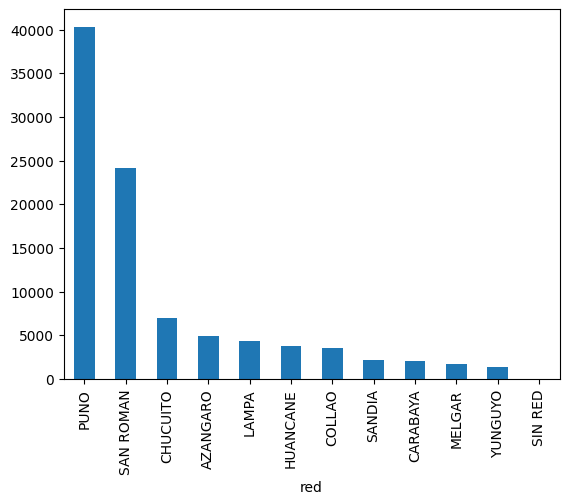

In [30]:
data.red.value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='count'>

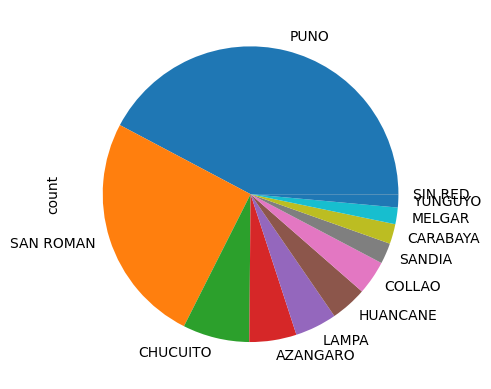

In [32]:
data.red.value_counts().plot(kind='pie')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-5990991c8f4e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, x='red', kind='count', palette=penguin_color, height=6, aspect=2)
<ipython-input-35-5990991c8f4e>:8: UserWarning: 
The palette list has fewer values (3) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data=data, x='red', kind='count', palette=penguin_color, height=6, aspect=2)


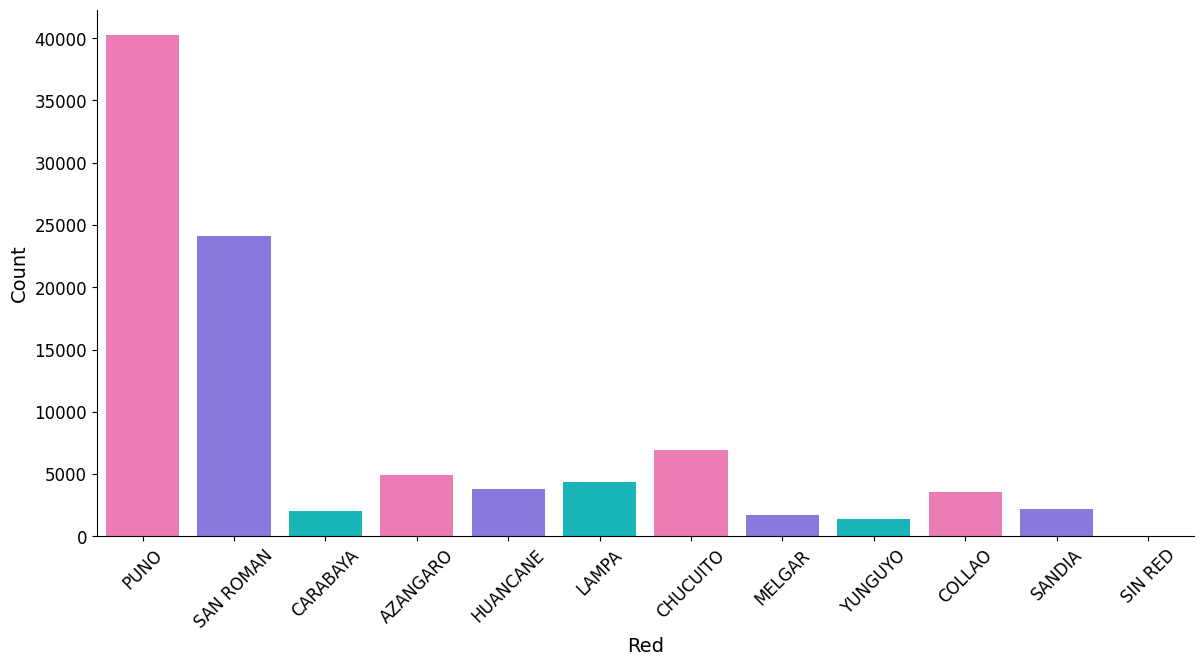

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette you want to use
penguin_color = ["#FF69B4", "#7B68EE", "#00CED1"]

# Ajustar tamaño de la figura, aspect para la relación ancho/alto
sns.catplot(data=data, x='red', kind='count', palette=penguin_color, height=6, aspect=2)

# Rotar etiquetas y ajustar tamaño de las letras
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Red", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Mostrar gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-04143b99984e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='red', data=data, palette='tab20')


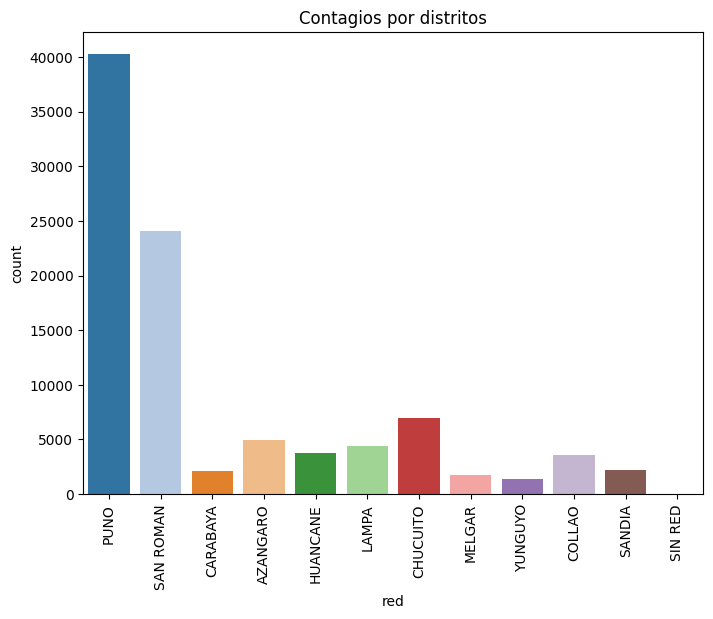

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafico de barras circular
plt.figure(figsize=(8,6))
sns.countplot(x='red', data=data, palette='tab20')
plt.title('Contagios por distritos')
plt.xticks(rotation=90)
plt.show()

#Histograma de la distribución de edades:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


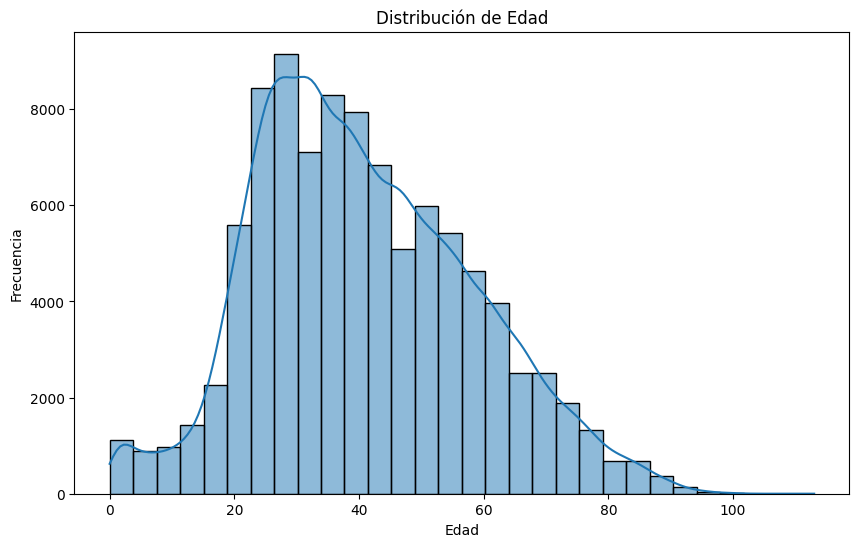

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['edad'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


#Distribución por sexo:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-cc7faa27587e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=data, palette='pastel')


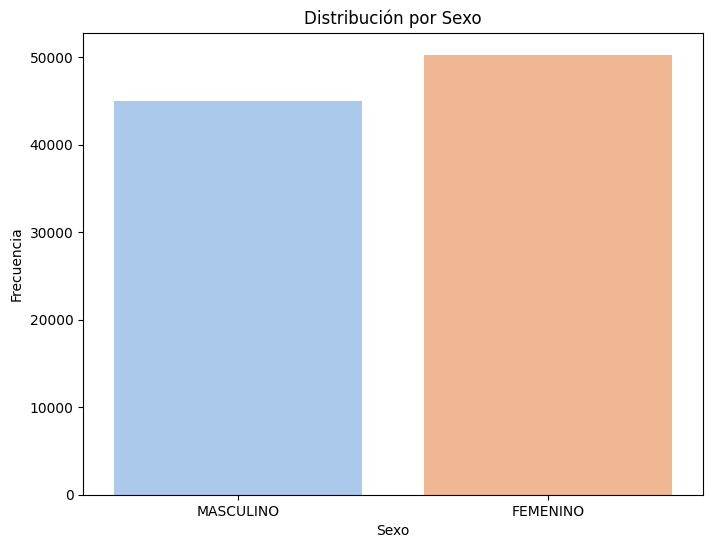

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sexo', data=data, palette='pastel')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

#Distribución Combinada de Edad y Sexo


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-44-98dcc2848c39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo', y='edad', data=data, palette='pastel')


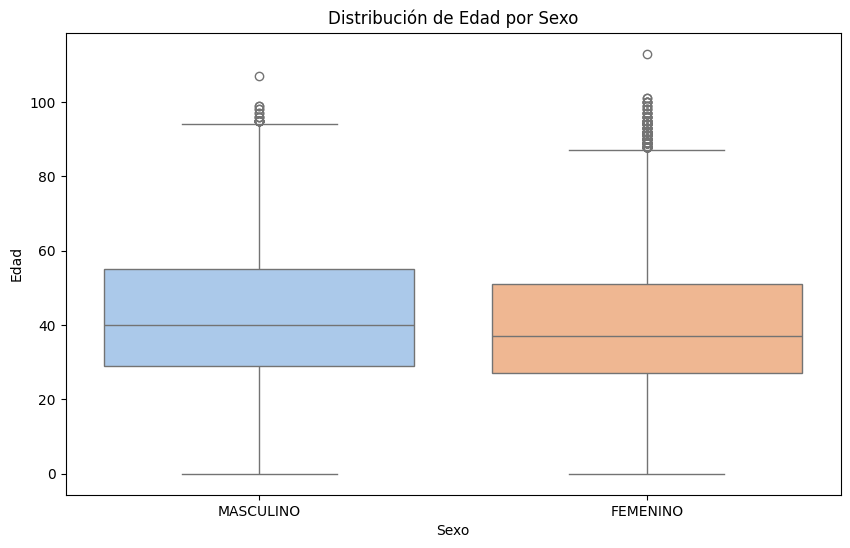

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='edad', data=data, palette='pastel')
plt.title('Distribución de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-a17eb86a3fc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='migrante', data=data, palette='deep')


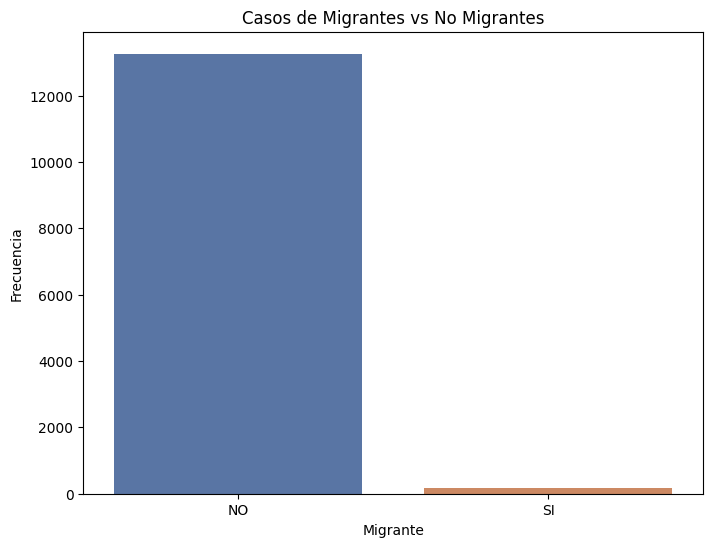

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='migrante', data=data, palette='deep')
plt.title('Casos de Migrantes vs No Migrantes')
plt.xlabel('Migrante')
plt.ylabel('Frecuencia')
plt.show()


#Distribución de casos por Grupo de edad y Sexo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


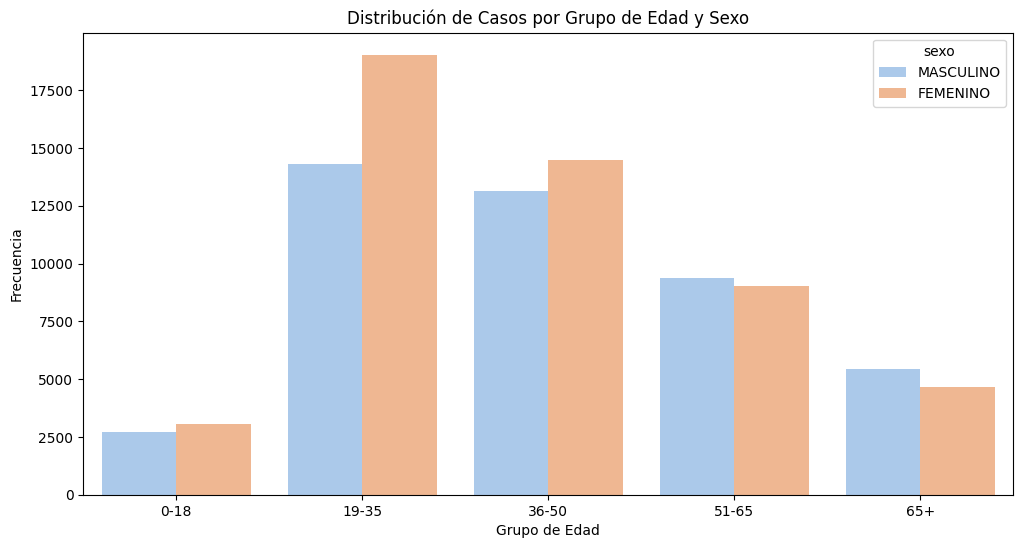

In [54]:
# Crear grupos de edad
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
data['grupo_edad'] = pd.cut(data['edad'], bins=bins, labels=labels, right=False)

# Visualizar distribución por grupo de edad y sexo
plt.figure(figsize=(12, 6))
sns.countplot(x='grupo_edad', hue='sexo', data=data, palette='pastel')
plt.title('Distribución de Casos por Grupo de Edad y Sexo')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.show()


#Pacientes Hospitalizados vs No Hospitalizados

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-de7f5617b376>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hospitalizado', data=data, palette='Set2')


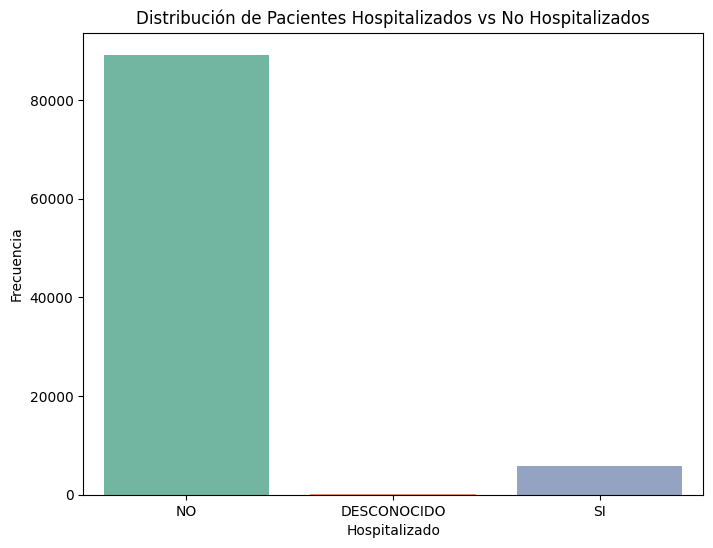

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hospitalizado', data=data, palette='Set2')
plt.title('Distribución de Pacientes Hospitalizados vs No Hospitalizados')
plt.xlabel('Hospitalizado')
plt.ylabel('Frecuencia')
plt.show()


#Tratamientos Recibidos en Hospitalización

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-cc95a7bc6712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sintoma, data=data, palette='plasma')


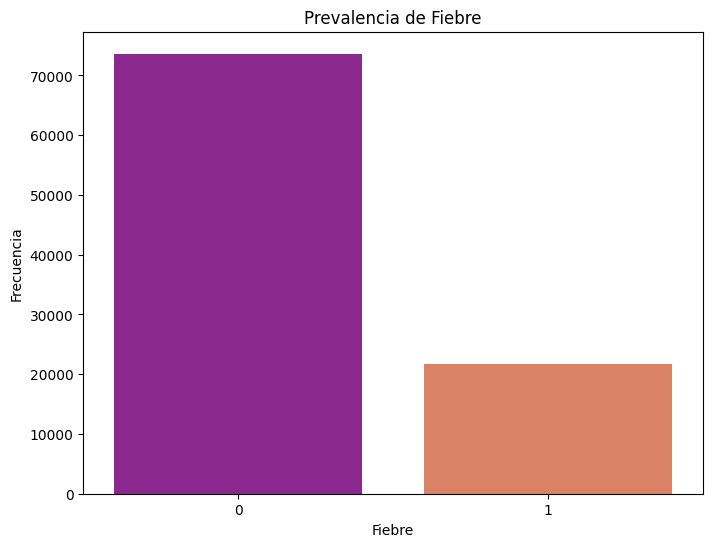

<ipython-input-59-cc95a7bc6712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sintoma, data=data, palette='plasma')


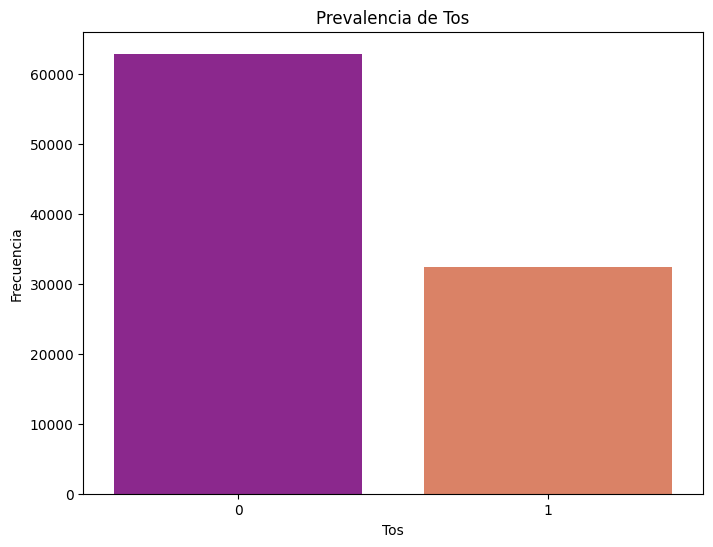

<ipython-input-59-cc95a7bc6712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sintoma, data=data, palette='plasma')


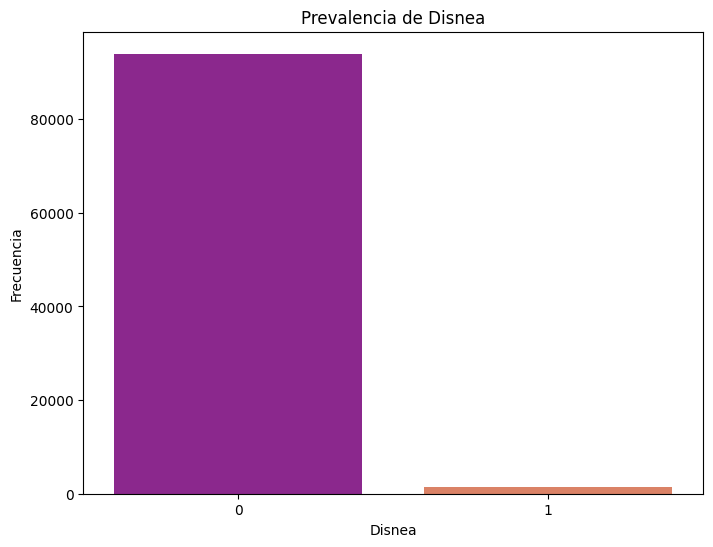

<ipython-input-59-cc95a7bc6712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sintoma, data=data, palette='plasma')


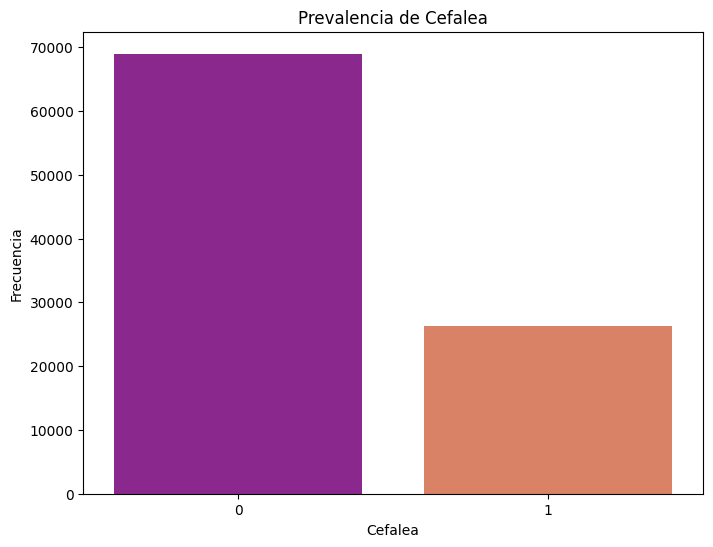

<ipython-input-59-cc95a7bc6712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sintoma, data=data, palette='plasma')


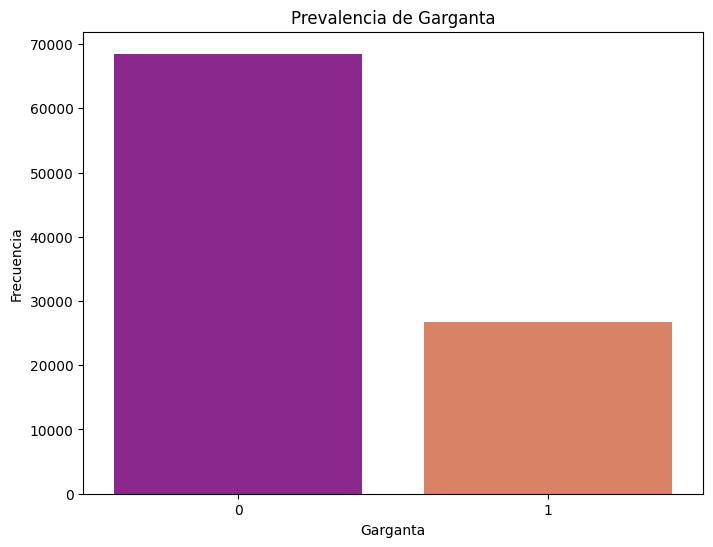

<ipython-input-59-cc95a7bc6712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sintoma, data=data, palette='plasma')


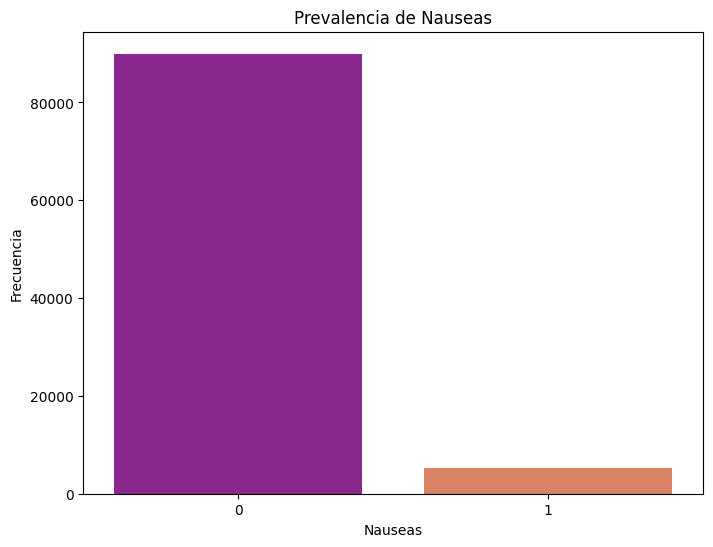

In [59]:
sintomas = ['fiebre', 'tos', 'disnea', 'cefalea', 'garganta', 'nauseas']

for sintoma in sintomas:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=sintoma, data=data, palette='plasma')
    plt.title(f'Prevalencia de {sintoma.capitalize()}')
    plt.xlabel(sintoma.capitalize())
    plt.ylabel('Frecuencia')
    plt.show()


#Relación entre Comorbilidades y Resultados

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


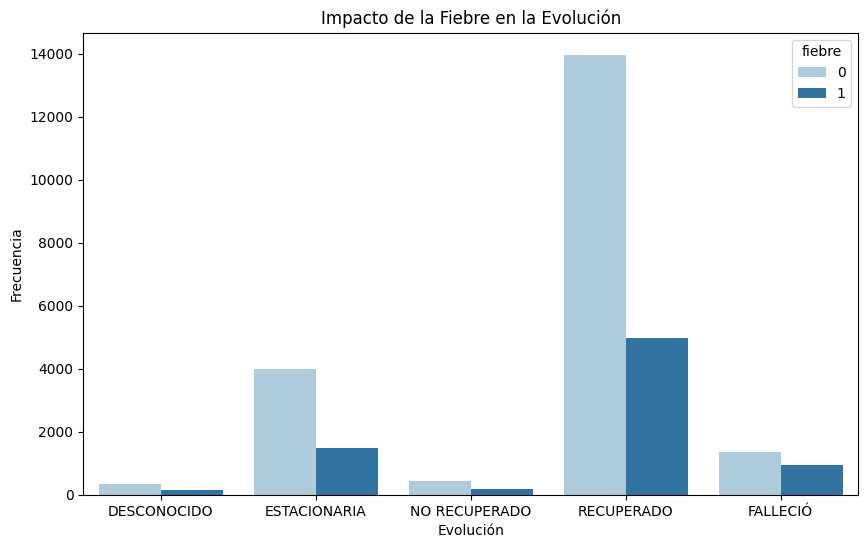

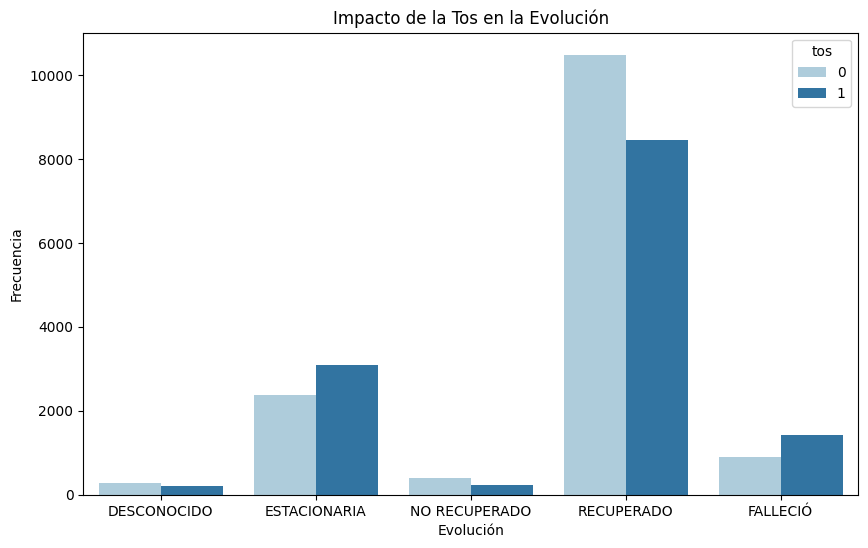

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='evolucion', hue='fiebre', data=data, palette='Paired')
plt.title('Impacto de la Fiebre en la Evolución')
plt.xlabel('Evolución')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='evolucion', hue='tos', data=data, palette='Paired')
plt.title('Impacto de la Tos en la Evolución')
plt.xlabel('Evolución')
plt.ylabel('Frecuencia')
plt.show()


#Análisis de Contactos y Exposición

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-67-348ee9606d5c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=contacto, data=data, palette='coolwarm')


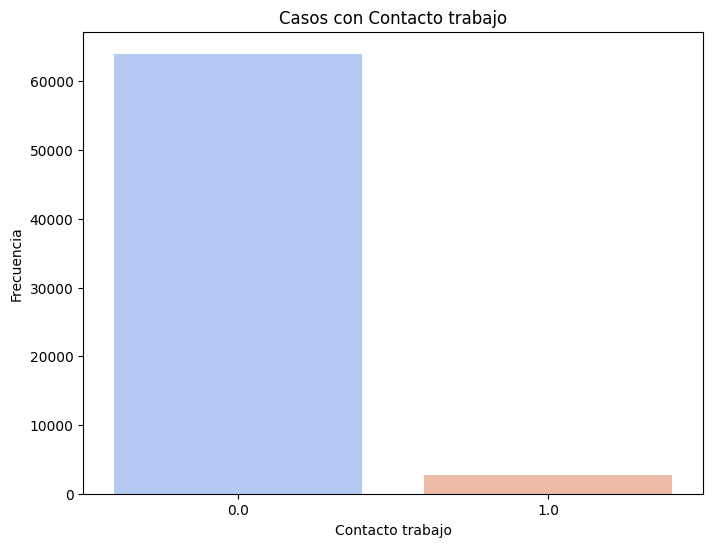

<ipython-input-67-348ee9606d5c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=contacto, data=data, palette='coolwarm')


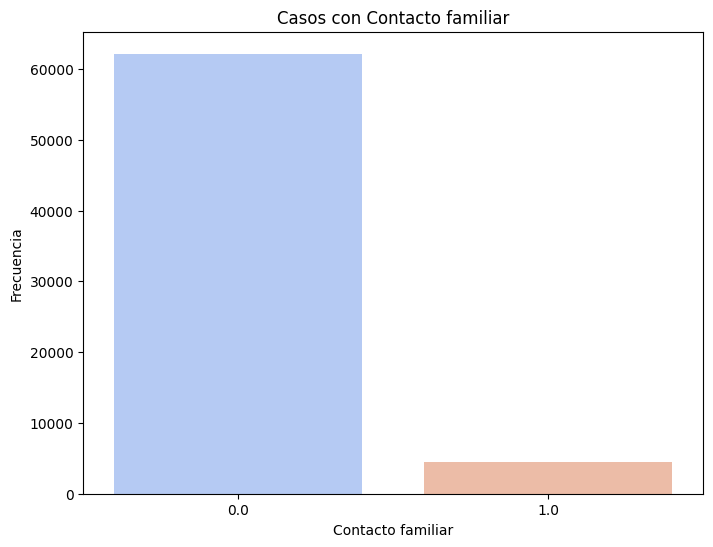

<ipython-input-67-348ee9606d5c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=contacto, data=data, palette='coolwarm')


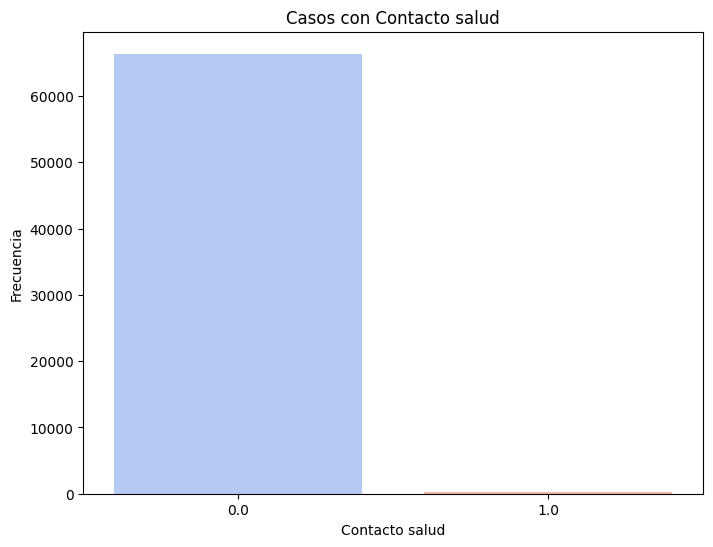

In [67]:
contactos = ['contacto_trabajo', 'contacto_familiar', 'contacto_salud']

for contacto in contactos:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=contacto, data=data, palette='coolwarm')
    plt.title(f'Casos con {contacto.replace("_", " ").capitalize()}')
    plt.xlabel(contacto.replace("_", " ").capitalize())
    plt.ylabel('Frecuencia')
    plt.show()

# Impacto del Viaje en la Propagación

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-68-21da36fb5265>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='viajado_14', data=data, palette='Set2')


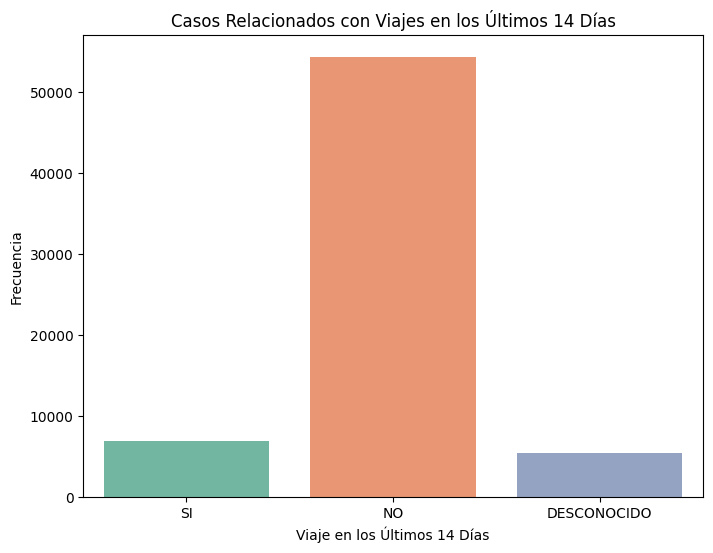

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='viajado_14', data=data, palette='Set2')
plt.title('Casos Relacionados con Viajes en los Últimos 14 Días')
plt.xlabel('Viaje en los Últimos 14 Días')
plt.ylabel('Frecuencia')
plt.show()


#Análisis de Frecuencia de Pruebas Realizadas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-ad4c9ff72572>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prueba', data=data, palette='coolwarm')


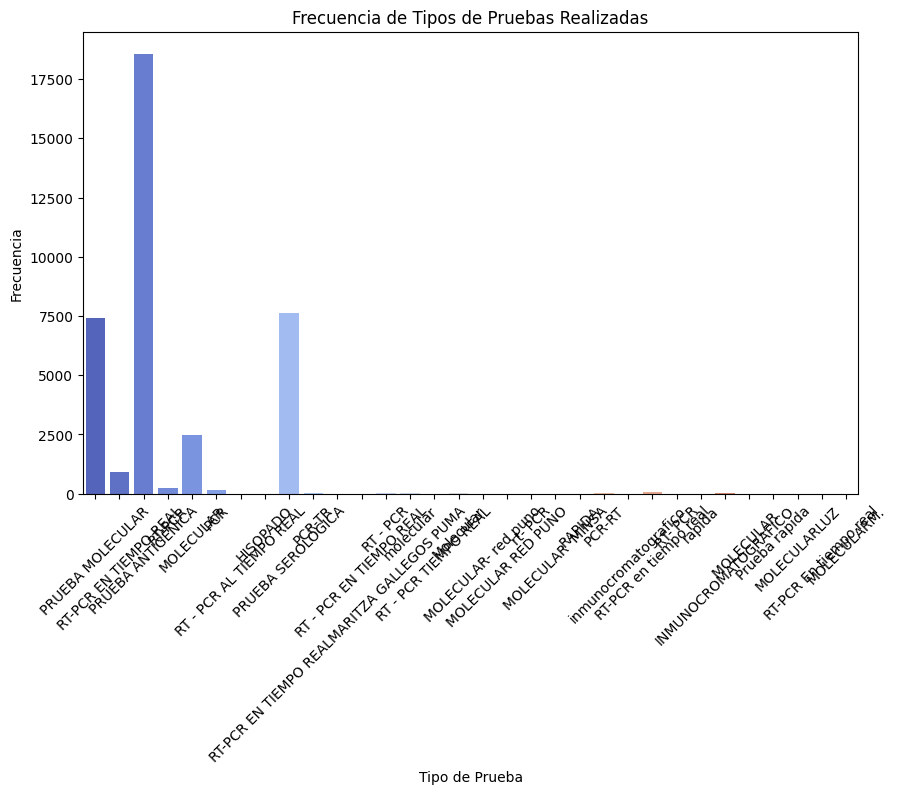

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='prueba', data=data, palette='coolwarm')
plt.title('Frecuencia de Tipos de Pruebas Realizadas')
plt.xlabel('Tipo de Prueba')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


#Análisis de Resultados de las Pruebas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-70-c690ab573e15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='resultado', data=data, palette='Set3')


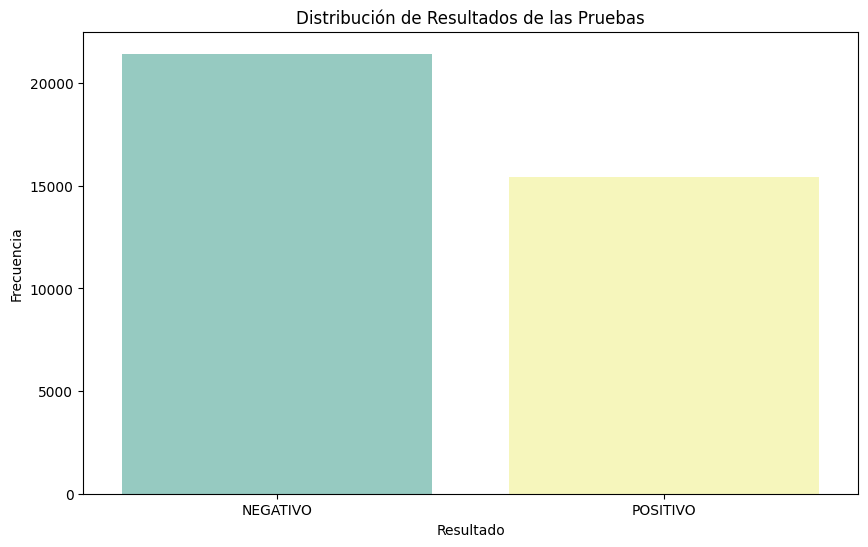

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='resultado', data=data, palette='Set3')
plt.title('Distribución de Resultados de las Pruebas')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()